In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("carprices.csv")
df.head() 

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car Model      13 non-null     object
 1   Mileage        13 non-null     int64 
 2   Sell Price($)  13 non-null     int64 
 3   Age(yrs)       13 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 548.0+ bytes


In [4]:
df.describe()

,Mileage,Sell Price($),Age(yrs)
count,13.000000,13.000000,13.000000
mean,60884.615385,26023.076923,5.307692
std,19185.665055,8003.661021,1.652504
min,22500.000000,12000.000000,2.000000
25%,52000.000000,20000.000000,5.000000
50%,59000.000000,26100.000000,5.000000
75%,72000.000000,32000.000000,6.000000
max,91000.000000,40000.000000,8.000000


In [5]:
df["Car Model"].value_counts()

Car Model
BMW X5                   5
Audi A5                  4
Mercedez Benz C class    4
Name: count, dtype: int64

In [7]:
df["Car Model"]=df["Car Model"].replace(
    {"BMW X5":0,
     "Audi A5":1,
     "Mercedez Benz C class":2
     
    }
)

In [15]:
df["Car Model"]=df["Car Model"].astype(int)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Car Model      13 non-null     int64
 1   Mileage        13 non-null     int64
 2   Sell Price($)  13 non-null     int64
 3   Age(yrs)       13 non-null     int64
dtypes: int64(4)
memory usage: 548.0 bytes


In [17]:
c=df.drop("Car Model",axis=1).columns

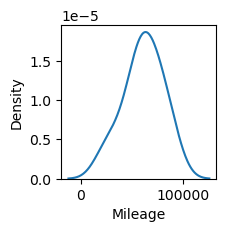

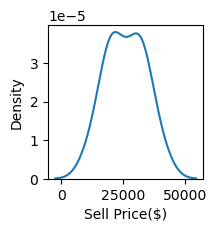

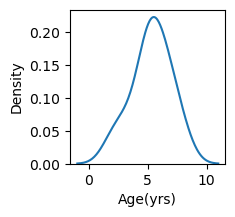

In [18]:
for i in c:
    plt.figure(figsize=(2,2))
    sns.kdeplot(df[i])
    plt.show()

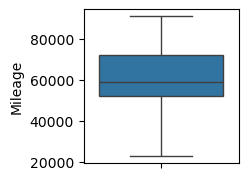

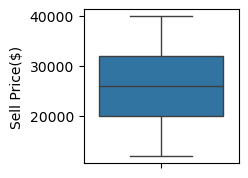

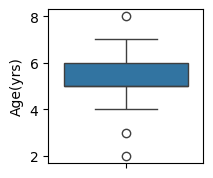

In [19]:
for i in c:
    plt.figure(figsize=(2,2))
    sns.boxplot(df[i])
    plt.show()

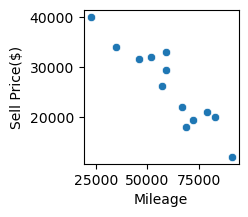

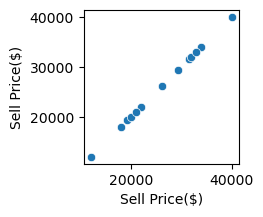

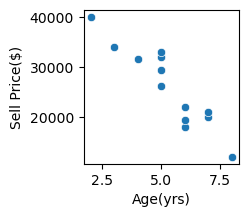

In [20]:
for i in c:
    plt.figure(figsize=(2,2))
    sns.scatterplot(data=df,x=i,y="Sell Price($)")
    plt.show()

<Axes: >

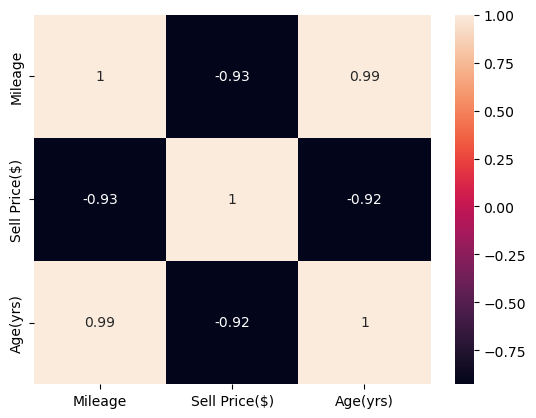

In [22]:
sns.heatmap(df[c].corr(),annot=True)

In [23]:
features=df.drop("Sell Price($)",axis=1)
target=df["Sell Price($)"]

In [24]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
    features, target, test_size=0.2, random_state=1)

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [26]:
model=DecisionTreeRegressor()

In [27]:
from sklearn.model_selection import cross_val_score

In [29]:
cv_dt=cross_val_score(model,features,target,cv=4)
np.mean(cv_dt)

np.float64(-3.2115232451155546)

In [30]:
model=DecisionTreeRegressor()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

In [31]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(ytest,ypred)
r2=r2_score(ytest,ypred)
print(f"MSE : {mse}")
print(f"R2 : {r2}")

MSE : 15713333.333333334
R2 : 0.5199918539135158


In [32]:
model=RandomForestRegressor()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

In [33]:
mse=mean_squared_error(ytest,ypred)
r2=r2_score(ytest,ypred)
print(f"MSE : {mse}")
print(f"R2 : {r2}")

MSE : 25407212.0
R2 : 0.22386495146290142
